# Part 2 - Analyse en composantes principales

## Import des librairies

In [1]:
import pandas as pd
import numpy as np
import pickle

from descstats import MyPCA

Github de mon module descstats : https://github.com/nicodesh/DescStats

## Import du dataset

In [2]:
with open('data/part1.pkl', 'rb') as f:
    my_unpickler = pickle.Unpickler(f)
    df = my_unpickler.load()
    
df.head(10)

,length,margin_up,margin_low,height_left,height_right,diagonal,is_genuine
0,112.83,2.89,4.52,104.86,104.95,171.81,1
1,113.29,2.87,4.01,103.74,103.70,171.67,1
2,113.84,2.88,4.40,103.76,103.76,171.83,1
3,113.63,3.12,3.73,103.78,103.65,171.80,1
4,113.55,2.27,5.04,103.70,103.75,172.05,1
5,113.16,2.99,4.54,104.65,104.44,172.57,1
6,113.30,2.90,3.97,103.55,103.80,172.38,1
7,113.38,3.19,3.54,103.65,103.37,171.58,1
8,113.53,3.33,4.06,103.51,103.75,171.96,1
9,112.47,3.02,4.63,104.34,104.20,172.14,1


## Analyse en composantes principales

In [3]:
df1 = df.drop('is_genuine', axis=1)
clusters = df['is_genuine']
mypca1 = MyPCA(df1, n_components=6, clusters=clusters)

## Ebouli des valeurs propres 

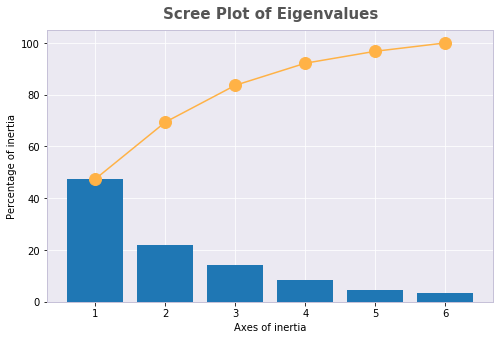

In [4]:
mypca1.scree()

## Projection du premier plan factoriel (F1 et F2)

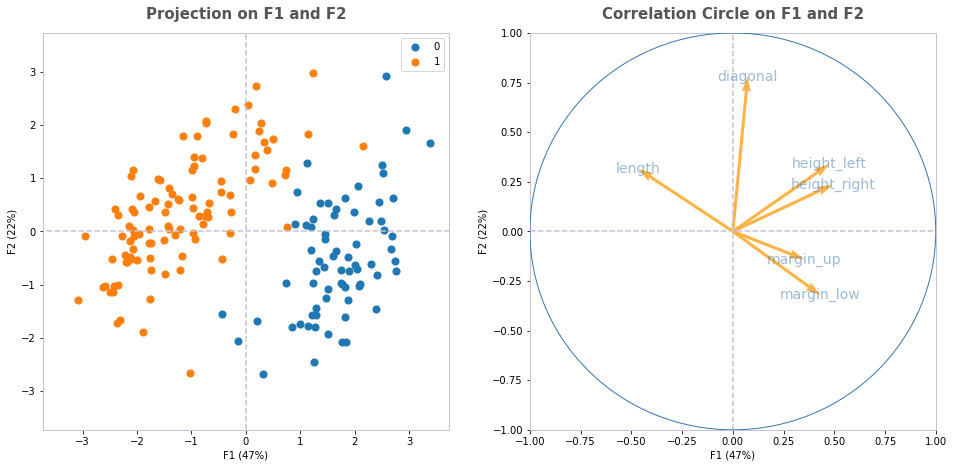

In [5]:
mypca1.scattercircle(1, 2, labelcircle=True)

## Interprétations

- F1 : Longueur du billet VS hauteur / marge
- F2 : Longueur de la diagonale

- Je n'ai conservé que cette projection car elle est de loin la plus pertinente.

- On voit que l'axe de la première composante est celui qui sépare principalement les vrais billets des faux billets. De plus, F1 explique 47% de l'inertie.
- Le second axe explique 22% de l'inertie et participe à la séparation des vrais billets et des faux billets.
- On voit qu'une diagonale sépare clairement les vrais et les faux billets.
- F1 permet dans de nombreux cas de déterminer s'il s'agit d'un vrai billet ou non. Pour les valeurs proches de zéro, alors c'est la valeur de F2 qui va permettre de discriminer.

In [6]:
with open('data/part2.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(df)